<a href="https://colab.research.google.com/github/EricEsajian/deep_learning_models/blob/master/09_Neural_Nets_Pretrained_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from IPython.core.display import display

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

# Constants

In [0]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

# Preprocessing Images

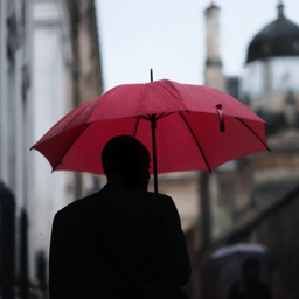

In [72]:
pic = load_img(FILE_1, target_size=(299, 299))
display(pic)

In [73]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [74]:
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [0]:
preprocessed = preprocess_input(expanded)

In [0]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299, 299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis=0)
  return preprocess_input(expanded)

In [0]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size=(224, 224))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis=0)
  return preprocess_input_vgg19(expanded)

# Load InceptionResNet

In [62]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 48.8 s, sys: 887 ms, total: 49.7 s
Wall time: 49.4 s


In [0]:
inception_model.graph = tf.get_default_graph()

# Making Predictions

In [64]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062965),
  ('n03788195', 'mosque', 0.0010572365),
  ('n03220513', 'dome', 0.0010311002)]]

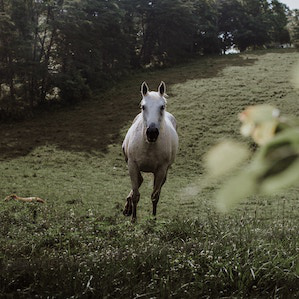

[[('n02389026', 'sorrel', 0.44831738),
  ('n02412080', 'ram', 0.029898943),
  ('n02106030', 'collie', 0.019694544),
  ('n04604644', 'worm_fence', 0.016888103),
  ('n04049303', 'rain_barrel', 0.013531349)]]

In [82]:
data = format_img_inceptionresnet('04 Horse.jpg')
prediction = inception_model.predict(data)
display(load_img('04 Horse.jpg'))
decode_predictions(prediction)

# Testing the VGG19 Model

In [0]:
vgg19_model = VGG19()

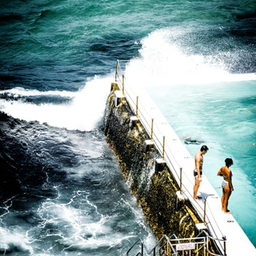

[[('n04347754', 'submarine', 0.16831167),
  ('n02894605', 'breakwater', 0.12554649),
  ('n03662601', 'lifeboat', 0.09670148),
  ('n09399592', 'promontory', 0.08424035),
  ('n02981792', 'catamaran', 0.08419328)]]

In [81]:
data = format_img_vgg19(FILE_3)
pred = vgg19_model.predict(data)
display(load_img(FILE_3))
decode_vgg19(pred)